In [1]:
import fairness_analysis

In [2]:
test_data = "Data/freMTPL2freq_preprocessed_test.csv"

In [3]:
def prepare_data(data):
    def bin_vehage_new(row):
        if  row["VehAge"] > 9:
            return "10+"
        return "-10"

    data["premium_claims_diff"] = data["Freq"] - data["predictions"] # Freq = ClaimNb / Exposure
    data["non_weighted_predictions"] = data["predictions"] * data["Exposure"]

    vehage_new_bins = ["10+", "-10"]
    data.loc[:,"vehage_new"] = data.apply(lambda row: bin_vehage_new(row), axis=1)

# Blind model

In [4]:
## load and prepare data
predictions_path_blind = "Data/my_predictions_blind.json"
data_blind = fairness_analysis.load_data(data_path=test_data, predictions_path=predictions_path_blind, limit="", data_filter="") # limit="LIMIT 1000" or limit=""
prepare_data(data_blind)

starting to load data
returning loaded data


We plot the means of our sample +/- the estimated 95% conficence interval of the sample mean [ group = -10 ].
We plot the means of our sample +/- the estimated 95% conficence interval of the sample mean [ group = 10+ ].


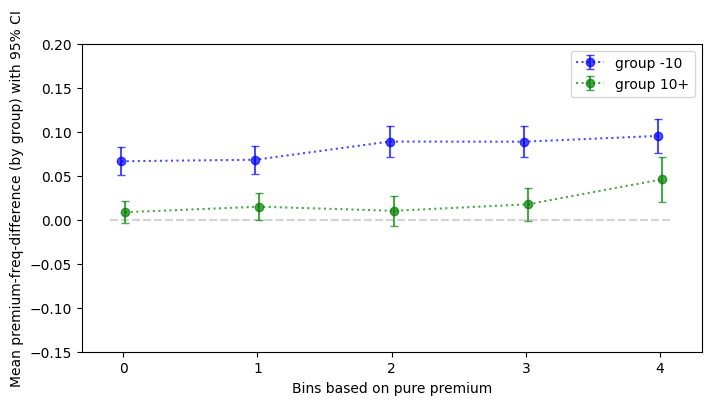

In [5]:
#plot fairness analysis
bin_thresholds, average_diffs_by_group, ttest_results = fairness_analysis.analyze_freq_by_premiumBins_and_group(full_data=data_blind, group_by = "vehage_new", nr_of_bins = 5, fig_size = (8,4), ylim=(-0.15,0.2))

# Aware model

In [6]:
## load and prepare data
predictions_path_aware = "Data/my_predictions_aware.json"
data_aware = fairness_analysis.load_data(data_path=test_data, predictions_path=predictions_path_aware, limit="", data_filter="") # limit="LIMIT 1000" or limit=""
prepare_data(data_aware)

starting to load data


returning loaded data


We plot the means of our sample +/- the estimated 95% conficence interval of the sample mean [ group = -10 ].
We plot the means of our sample +/- the estimated 95% conficence interval of the sample mean [ group = 10+ ].


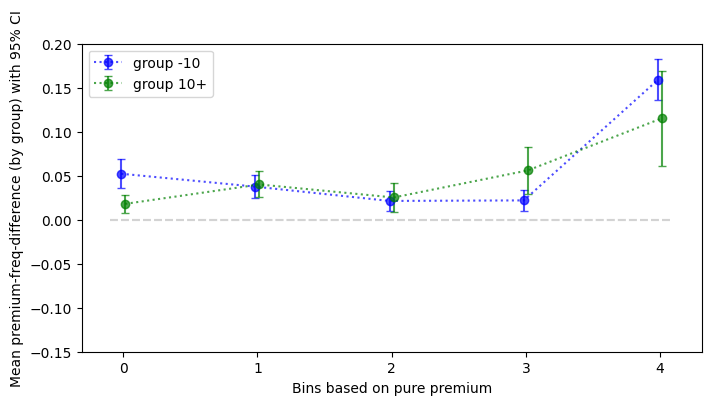

In [7]:
#plot fairness analysis
bin_thresholds, average_diffs_by_group, ttest_results = fairness_analysis.analyze_freq_by_premiumBins_and_group(full_data=data_aware, group_by = "vehage_new", nr_of_bins = 5, fig_size = (8,4), ylim=(-0.15,0.2))